# Executive Summary

# High Level Goal

Your team has been hired to provide research for a political campaign. They have obtained a dataset of crime statistics for a selection of counties in North Carolina.

Your task is to examine the data to help the campaign understand the determinants of crime and to generate policy suggestions that are applicable to local government.

My Takeaway: Fundamentally, our goal is to
* A. _help understand the determinants of crime_
* B. _make informed policy suggestions accordingly_

_A_ will be a statistical task, and doing _B_ will be require us to wear socio-political hats. Presumably, the interest of our audience, a political campaign is to pitch itself to the public for election using informed policy ideas for _reducing_ crime.

In order to A, we must identify a measurable proxy for crime. I think that the most natural choice for this is the variable `crmrte` giving the crimes committed per person.


In [1]:
# Load the data
crime <- read.csv('crime_v2.csv')

## Exploratory Cleaning

Checking for missing values.

In [2]:
summary(is.na(crime))

   county           year           crmrte          prbarr       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:91        FALSE:91        FALSE:91        FALSE:91       
 TRUE :6         TRUE :6         TRUE :6         TRUE :6        
  prbconv         prbpris          avgsen          polpc        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:97        FALSE:91        FALSE:91        FALSE:91       
                 TRUE :6         TRUE :6         TRUE :6        
  density          taxpc            west          central       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:91        FALSE:91        FALSE:91        FALSE:91       
 TRUE :6         TRUE :6         TRUE :6         TRUE :6        
   urban          pctmin80          wcon            wtuc        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:91        FALSE:91        FALSE:91        FALSE:91       
 TRUE :6         TRUE :6 

The output of the summary of missing values reveals that every column has precisely 6 missing values.

In [3]:
crime[91:nrow(crime), ]
paste0("Number of missing values in first 92 rows: ", sum(is.na(crime[1:91, ])))

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
,<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
91,197,87,0.0141928,0.207595,1.182929993,0.360825,12.23,0.00118573,0.889881,25.95258,⋯,341.8803,182.802,348.1432,212.8205,322.92,391.72,385.65,306.85,0.06756757,0.07419893
92,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,`,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] "Number of missing values in first 92 rows: 0"

The last 6 rows are filled exclusively with `NA`s, while all the rows up to and including the 91st contain no missing values. Therefore, will omit the existing `NA`s with no loss of important information. 

In [4]:
crime <- na.omit(crime)

Now, we will have a quick look at the variables data types.

In [5]:
str(crime)

'data.frame':	91 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

All of the variables in this dataset aside are conceptually numeric, but the probabilty of conviction, `prbarr` has been inferred as a factor. Therefore, it is necessary to cast it as a numeric variable.

In [6]:
crime$prbconv <- as.numeric(crime$prbconv)

Additionally, we will remove the `county` and `year` because `year` is a constant, and the counties' unique nnumerical identifiers will not be relevant to any analysis.

In [7]:
crime <- crime[!names(crime) %in% c('year', 'county')]

Lastly, we will take a look at the variable summaries to see whether the data is within normal bounds.

In [31]:
summary(crime)

     crmrte             prbarr           prbconv         prbpris      
 Min.   :0.005533   Min.   :0.09277   Min.   : 3.00   Min.   :0.1500  
 1st Qu.:0.020927   1st Qu.:0.20568   1st Qu.:25.50   1st Qu.:0.3648  
 Median :0.029986   Median :0.27095   Median :48.00   Median :0.4234  
 Mean   :0.033400   Mean   :0.29492   Mean   :47.75   Mean   :0.4108  
 3rd Qu.:0.039642   3rd Qu.:0.34438   3rd Qu.:70.00   3rd Qu.:0.4568  
 Max.   :0.098966   Max.   :1.09091   Max.   :92.00   Max.   :0.6000  
     avgsen           polpc              density            taxpc       
 Min.   : 5.380   Min.   :0.0007459   Min.   :0.00002   Min.   : 25.69  
 1st Qu.: 7.340   1st Qu.:0.0012308   1st Qu.:0.54741   1st Qu.: 30.66  
 Median : 9.100   Median :0.0014853   Median :0.96226   Median : 34.87  
 Mean   : 9.647   Mean   :0.0017022   Mean   :1.42884   Mean   : 38.06  
 3rd Qu.:11.420   3rd Qu.:0.0018768   3rd Qu.:1.56824   3rd Qu.: 40.95  
 Max.   :20.700   Max.   :0.0090543   Max.   :8.82765   Max.   :1

While most of the data appears within normal bounds, it comes to our attention that some of the probability varialbles, namely `prbarr` and `prbconv`, are outside of expected bounds. There summaries are as follows:


In [38]:
print('Probaility of arrest summary:')
summary(crime$prbarr)
print('Probability of conviction')
summary(crime$prbconv)

[1] "Probaility of arrest summary:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.09277 0.20568 0.27095 0.29492 0.34438 1.09091 

[1] "Probability of conviction"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00   25.50   48.00   47.75   70.00   92.00 

All counties probability of conviction values are bounded between 0 and 100, so we speculate that these numbers are percentages, and not probabilities. Thus, we will transform this column by scaling it by $1/100$.

However, there is ...

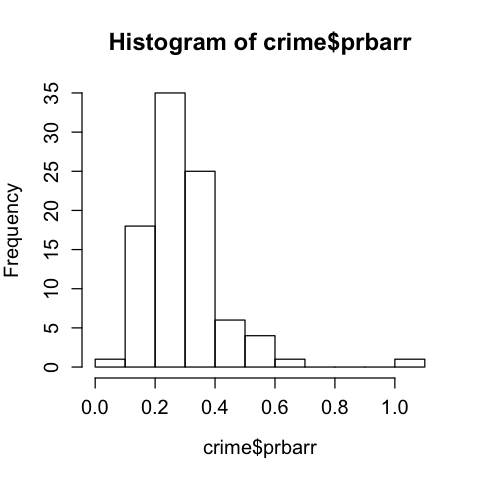

In [52]:
options(repr.plot.height = 4, repr.plot.width = 4, repr.plot.pointsize = 10)
hist(crime$prbarr)

In [59]:
crime$prbconv <- 0.001*crime$prbconv
crime$prbarr[crime$prbarr > 1.0] <- crime$prbarr[crime$prbarr > 1.0] - 1 

## Exploratory Analysis

In [61]:
round(cor(crime, method = 'spearman'),2)[, 'crmrte']

crmrte   prbarr  prbconv  prbpris   avgsen    polpc  density    taxpc 
    1.00    -0.28    -0.35     0.00     0.09     0.53     0.66     0.22 
    west  central    urban pctmin80     wcon     wtuc     wtrd     wfir 
   -0.40     0.19     0.45     0.29     0.38     0.21     0.32     0.21 
    wser     wmfg     wfed     wsta     wloc      mix  pctymle 
    0.31     0.46     0.53     0.11     0.37     0.03     0.34

The variables `density`, `urban`, `polpc` and `wfed`, which represent people per square mile, an indicator for an urban county, police per capita and the average weekly wage of federal employees, respectively, have the highest spearman correlations with crime rate in magnitude. This result suggests that such variables could be the key derminants of crime rate.

In [62]:
round(cor(crime[,c('density', 'urban', 'polpc', 'wfed')]), 2)

,density,urban,polpc,wfed
density,1.00,0.82,0.16,0.59
urban,0.82,1.00,0.16,0.42
polpc,0.16,0.16,1.00,0.16
wfed,0.59,0.42,0.16,1.00


The strong correlation between `urban` and `density` is unsurprising because urban cities are dense clusters of people. As such, we will not include `density` in out baseline model as it does not offer much information that isn't already provided by `density`, and the baseline model will then. 

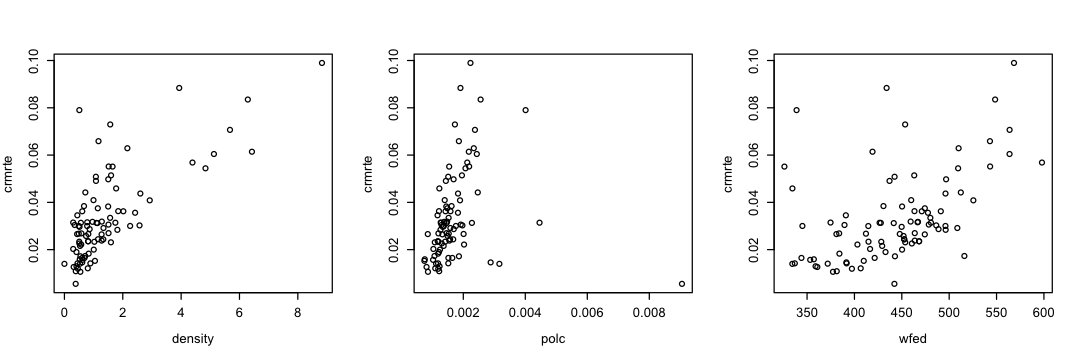

In [63]:
options(repr.plot.height = 3, repr.plot.width = 9, repr.plot.pointsize = 10)
par(mfrow = c(1, 3))
plot(crime[,'density'], crime[,'crmrte'], xlab = 'density', ylab = 'crmrte')
plot(crime[, 'polpc'], crime[,'crmrte'], xlab = 'polc', ylab = 'crmrte')
plot(crime[,'wfed'], crime[,'crmrte'], xlab = 'wfed', ylab = 'crmrte')

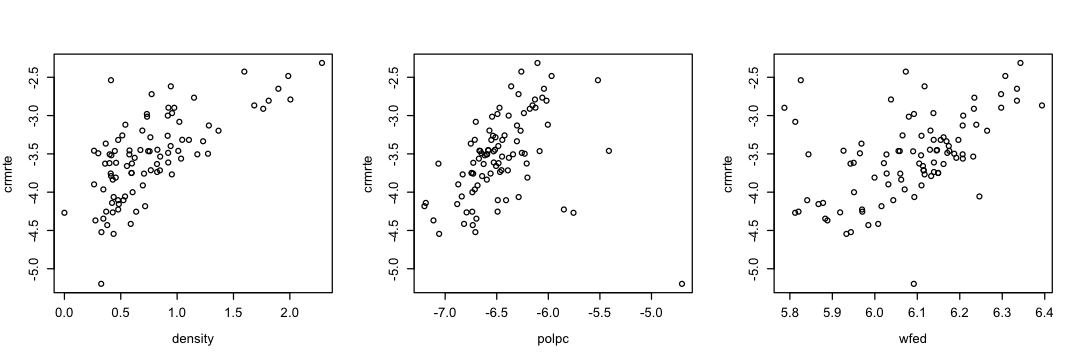

In [64]:
options(repr.plot.height = 3, repr.plot.width = 9, repr.plot.pointsize = 10)
par(mfrow = c(1, 3))
plot(log(crime[,'density'] + 1), log(crime[,'crmrte']), xlab = 'density', ylab = 'crmrte')
plot(log(crime[, 'polpc']), log(crime[,'crmrte']), xlab = 'polpc', ylab = 'crmrte')
plot(log(crime[,'wfed']), log(crime[,'crmrte']), xlab = 'wfed', ylab = 'crmrte')

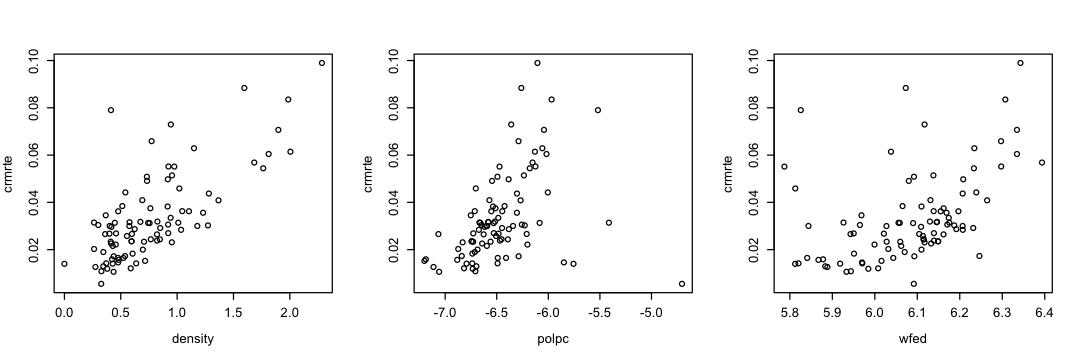

In [65]:
options(repr.plot.height = 3, repr.plot.width = 9, repr.plot.pointsize = 10)
par(mfrow = c(1, 3))
plot(log(crime[,'density'] + 1), crime[,'crmrte'], xlab = 'density', ylab = 'crmrte')
plot(log(crime[, 'polpc']), crime[,'crmrte'], xlab = 'polpc', ylab = 'crmrte')
plot(log(crime[,'wfed']), crime[,'crmrte'], xlab = 'wfed', ylab = 'crmrte')

## Model V1.

Of the variables in the dataset, we believe that two of them are are the subjects of policy, while the rest are outside the immediate scope of its control. They are the key explanatory vaiables of interest and they are the following.
* Police per Capita
    * denoted `polpc`
    * correlation with crime: 0.17
* Tax Revenue per Capita
    * denoted `taxpc`
    * correlation with crime:  0.45


Let's take a glance at the relationships between crimerate, polic per capita and tax revenue.

In [66]:
model.1 <- lm(crmrte ~ log(density+1) + polpc + wfed, data = crime)
summary(model.1)


Call:
lm(formula = crmrte ~ log(density + 1) + polpc + wfed, data = crime)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.025155 -0.008605 -0.002926  0.007159  0.052984 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       7.825e-03  1.181e-02   0.663    0.509    
log(density + 1)  3.056e-02  4.103e-03   7.448 6.47e-11 ***
polpc             1.467e+00  1.406e+00   1.043    0.300    
wfed             -8.832e-07  3.070e-05  -0.029    0.977    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01299 on 87 degrees of freedom
Multiple R-squared:  0.539,	Adjusted R-squared:  0.5231 
F-statistic: 33.91 on 3 and 87 DF,  p-value: 1.302e-14


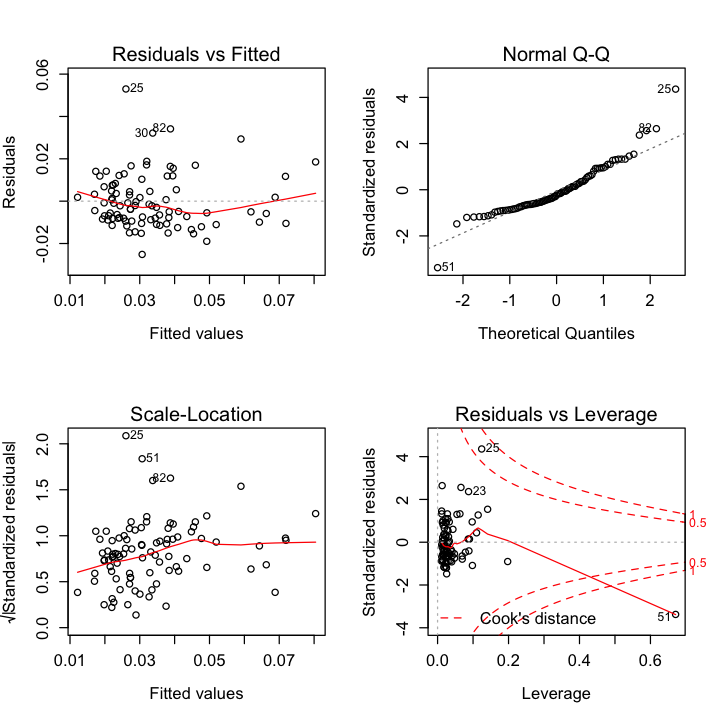

In [67]:
options(repr.plot.height = 6, repr.plot.width = 6, repr.plot.pointsize = 10)
par(mfrow = c(2,2))
plot(model.1)

In [166]:
model.1.1 <- lm(crmrte ~ log(density+1) + polpc + wfed, data = crime[-c(51),])
summary(model.1.1)


Call:
lm(formula = crmrte ~ log(density + 1) + polpc + wfed, data = crime[-c(51), 
    ])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.031629 -0.008328 -0.001920  0.008605  0.035654 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -4.290e-04  1.131e-02  -0.038 0.969819    
log(density + 1)  2.659e-02  4.003e-03   6.642 2.67e-09 ***
polpc             8.091e+00  2.263e+00   3.575 0.000578 ***
wfed              1.086e-06  2.879e-05   0.038 0.969991    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01218 on 86 degrees of freedom
Multiple R-squared:  0.5893,	Adjusted R-squared:  0.575 
F-statistic: 41.13 on 3 and 86 DF,  p-value: < 2.2e-16


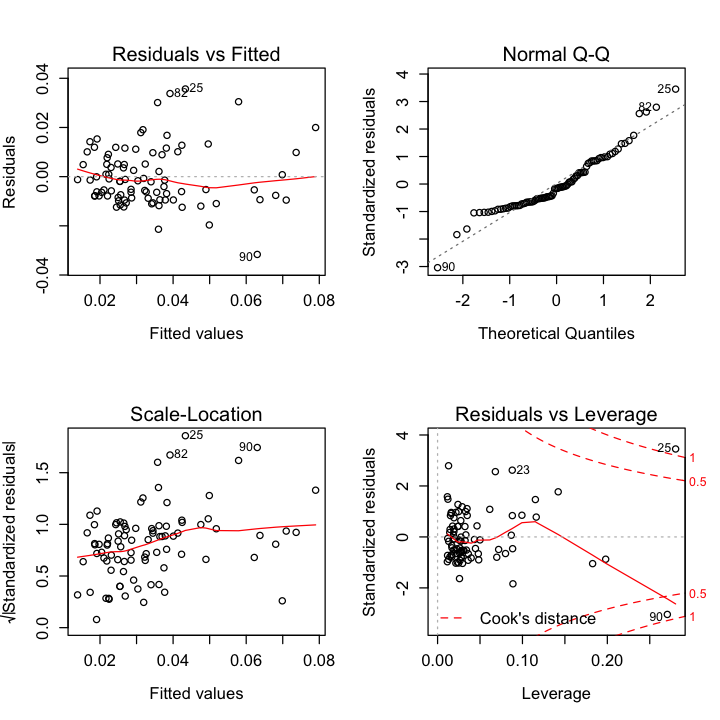

In [167]:
options(repr.plot.height = 6, repr.plot.width = 6, repr.plot.pointsize = 10)
par(mfrow = c(2,2))
plot(model.1.1)

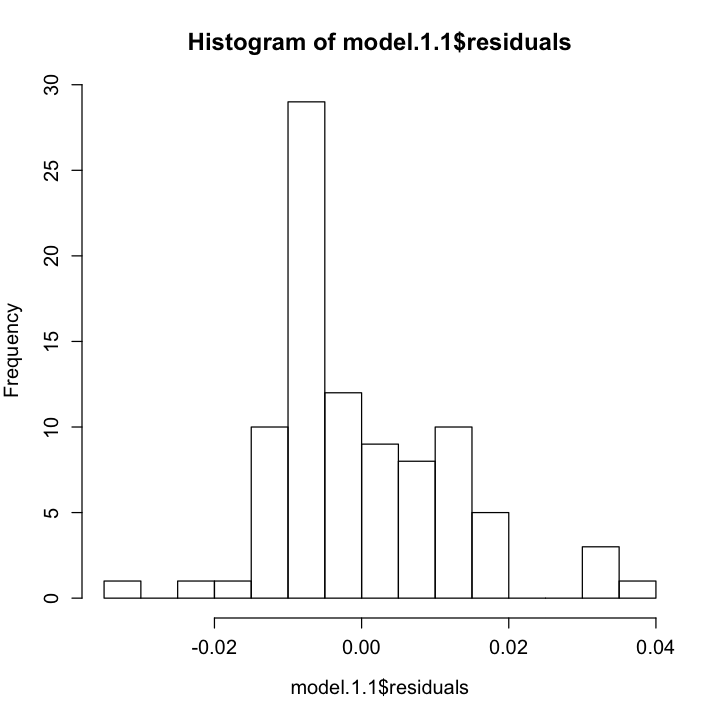

In [70]:
hist(model.1.1$residuals, breaks = 10)

In [88]:
crime$log.density <- log(crime$density + 1)
examined.cols <- c('log.density', 'polpc', 'urban', 'wfed')
round(cor(crime[,!names(crime) %in% examined.cols], method = 'spearman')[, 'crmrte'], 2)

crmrte   prbarr  prbconv  prbpris   avgsen  density    taxpc     west 
    1.00    -0.28    -0.35     0.00     0.09     0.66     0.22    -0.40 
 central pctmin80     wcon     wtuc     wtrd     wfir     wser     wmfg 
    0.19     0.29     0.38     0.21     0.32     0.21     0.31     0.46 
    wsta     wloc      mix  pctymle 
    0.11     0.37     0.03     0.34

In [89]:
new.cols <- c('prbconv', 'wcon', 'wmfg', 'wloc', 'pctymle')
round(cor(crime)[new.cols, examined.cols[examined.cols != 'urban']], 2)

,log.density,polpc,wfed
prbconv,-0.29,-0.03,0.02
wcon,0.49,-0.02,0.51
wmfg,0.46,0.27,0.51
wloc,0.48,0.38,0.52
pctymle,0.18,0.05,-0.06


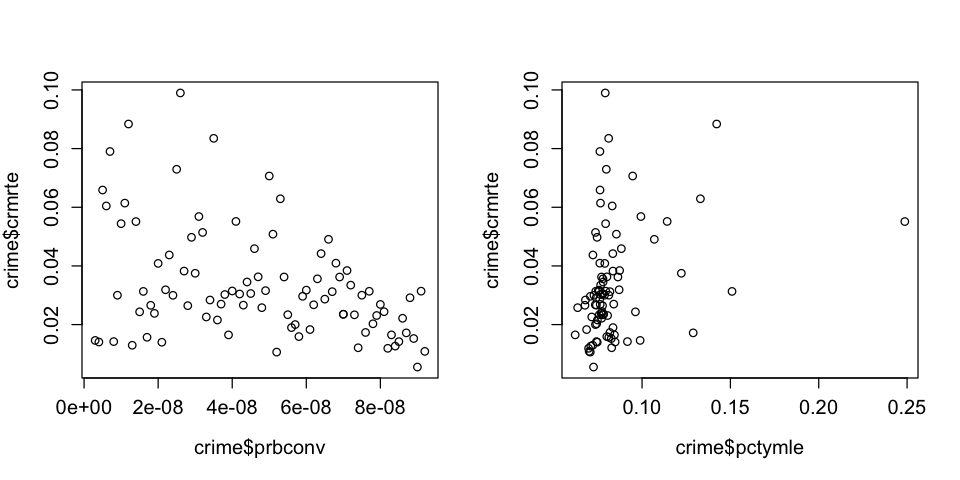

In [91]:
options(repr.plot.height = 4, repr.plot.width = 8, repr.plot.pointsize = 10)
par(mfrow = c(1, 2))
plot(crime$prbconv, crime$crmrte)
plot(crime$pctymle, crime$crmrte)

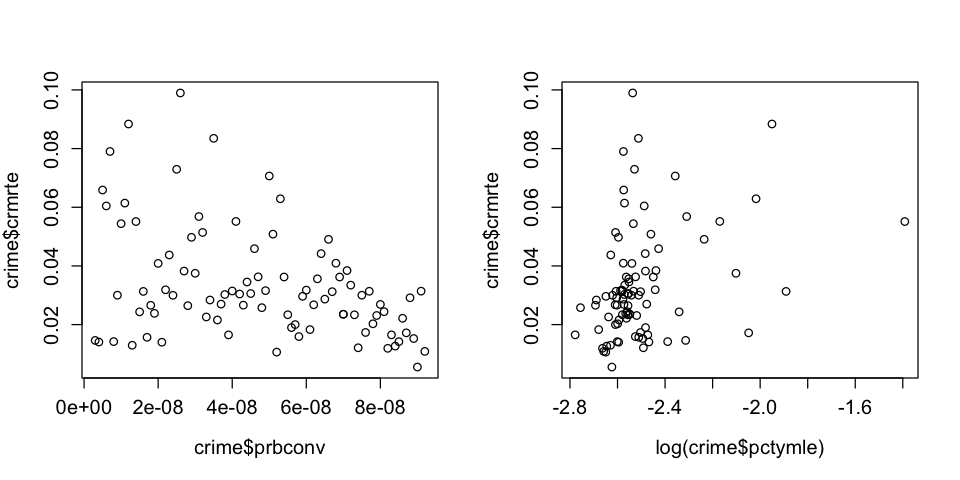

In [95]:
options(repr.plot.height = 4, repr.plot.width = 8, repr.plot.pointsize = 10)
par(mfrow = c(1, 2))
plot(crime$prbconv, crime$crmrte)
plot(log(crime$pctymle), crime$crmrte)

# Model V2

In [115]:
crime[1,'prbarr']

[1] 0.29827

In [123]:
model.2 <- lm(crmrte ~ log(density+1) + polpc + wfed + prbconv + pctymle, data = crime[-c(51),])
summary(model.2)


Call:
lm(formula = crmrte ~ log(density + 1) + polpc + wfed + prbconv + 
    pctymle, data = crime[-c(51), ])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.025905 -0.008063 -0.001724  0.007358  0.037084 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.211e-02  1.279e-02  -0.947  0.34654    
log(density + 1)  2.170e-02  4.181e-03   5.190 1.44e-06 ***
polpc             6.611e+00  2.236e+00   2.957  0.00404 ** 
wfed              3.257e-05  2.959e-05   1.101  0.27410    
prbconv          -1.115e+05  5.350e+04  -2.084  0.04019 *  
pctymle           1.091e-01  5.608e-02   1.946  0.05496 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01171 on 84 degrees of freedom
Multiple R-squared:  0.6293,	Adjusted R-squared:  0.6073 
F-statistic: 28.52 on 5 and 84 DF,  p-value: < 2.2e-16


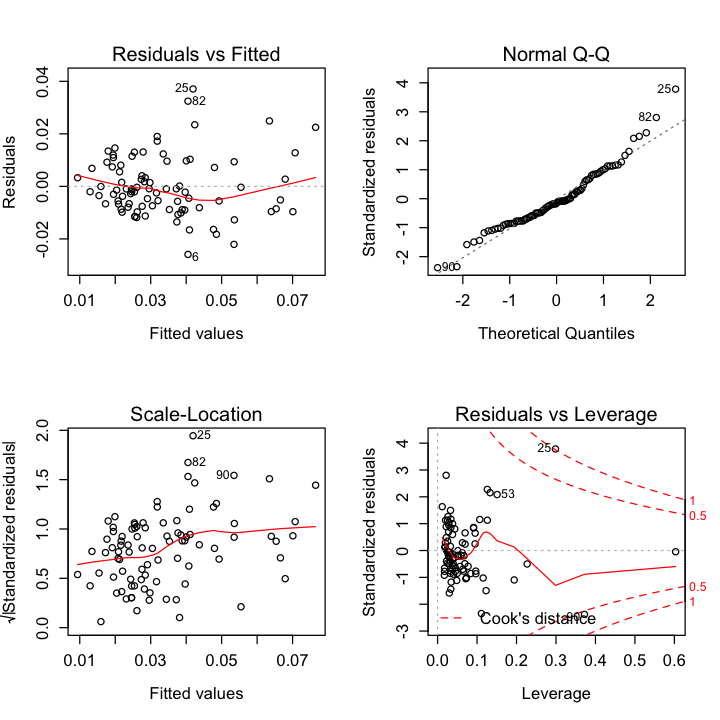

In [124]:
options(repr.plot.height = 6, repr.plot.width = 6, repr.plot.pointsize = 10)
par(mfrow = c(2,2))
plot(model.2)

In [129]:
model.2.2 <- lm(crmrte ~ log(density+1) + polpc + wfed + prbconv + pctymle, data = crime[-c(51,25),])
summary(model.2.2)


Call:
lm(formula = crmrte ~ log(density + 1) + polpc + wfed + prbconv + 
    pctymle, data = crime[-c(51, 25), ])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.017499 -0.007936 -0.002166  0.007337  0.033590 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -2.038e-02  1.189e-02  -1.714  0.09033 .  
log(density + 1)  2.275e-02  3.839e-03   5.925 6.86e-08 ***
polpc             1.868e+00  2.349e+00   0.795  0.42882    
wfed              5.776e-05  2.779e-05   2.078  0.04078 *  
prbconv          -9.574e+04  4.917e+04  -1.947  0.05491 .  
pctymle           1.408e-01  5.195e-02   2.709  0.00819 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01073 on 83 degrees of freedom
Multiple R-squared:  0.6705,	Adjusted R-squared:  0.6506 
F-statistic: 33.77 on 5 and 83 DF,  p-value: < 2.2e-16


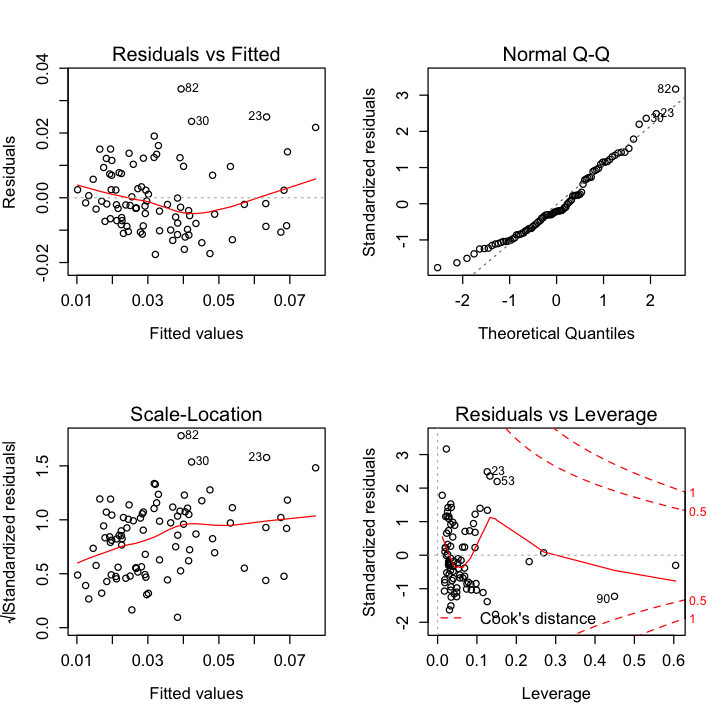

In [128]:
options(repr.plot.height = 6, repr.plot.width = 6, repr.plot.pointsize = 10)
par(mfrow = c(2,2))
plot(model.2.2)

# Model V3

In [138]:
crime.2 <-  crime[ ,!names(crime) %in% c('density')]
model.3 <- lm(crmrte ~ ., data  = crime.2[-c(25,51),])
summary(model.3)


Call:
lm(formula = crmrte ~ ., data = crime.2[-c(25, 51), ])

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0140174 -0.0049286 -0.0007862  0.0037902  0.0188048 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.047e-03  1.822e-02   0.222  0.82490    
prbarr      -4.559e-02  1.070e-02  -4.259 6.65e-05 ***
prbconv     -1.347e+05  4.549e+04  -2.962  0.00424 ** 
prbpris      4.498e-04  1.150e-02   0.039  0.96892    
avgsen      -7.702e-04  3.823e-04  -2.015  0.04800 *  
polpc        2.220e+00  2.189e+00   1.014  0.31428    
taxpc        2.071e-05  1.231e-04   0.168  0.86694    
west         1.676e-03  3.798e-03   0.441  0.66041    
central     -2.902e-03  2.622e-03  -1.107  0.27230    
urban        4.641e-03  5.421e-03   0.856  0.39511    
pctmin80     4.348e-04  9.222e-05   4.715 1.29e-05 ***
wcon         2.027e-05  2.629e-05   0.771  0.44347    
wtuc         3.250e-06  1.442e-05   0.225  0.82238    
wtrd         3.035e-05  4.352

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”

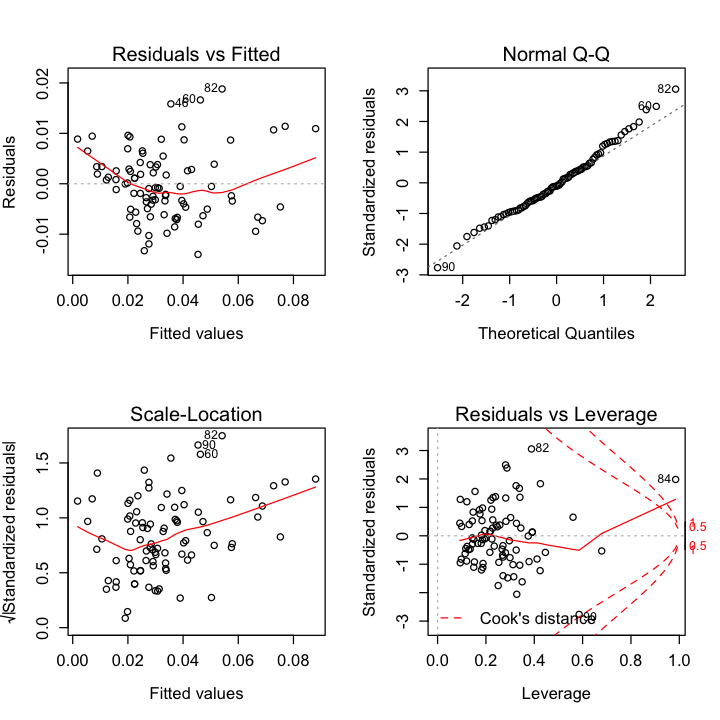

In [140]:
options(repr.plot.height = 6, repr.plot.width = 6, repr.plot.pointsize = 10)
par(mfrow = c(2,2))
plot(model.3)

# Omitted Variables



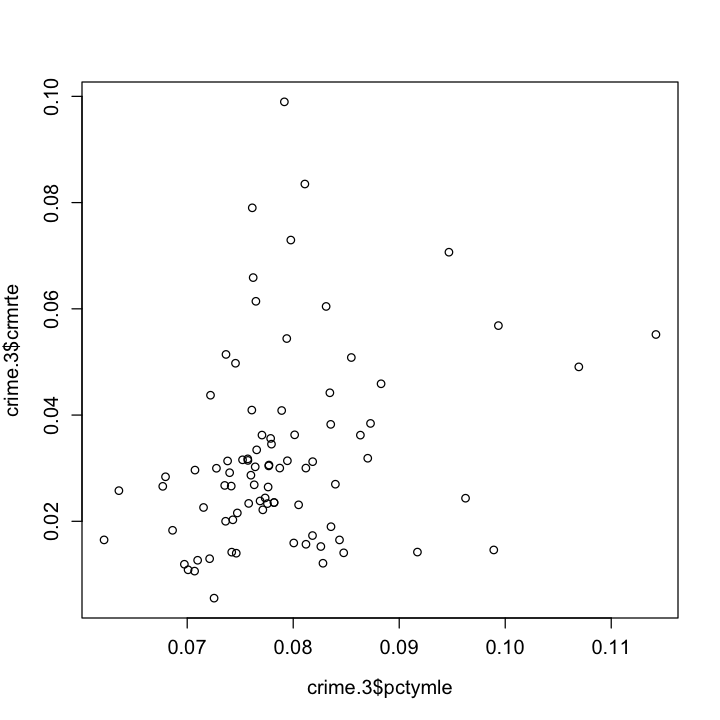

In [147]:
crime.3 <- crime[crime$pctymle < 0.12,]
plot(crime.3$pctymle, crime.3$crmrte)

# Regression Tables

In [150]:
install.packages('stargazer')


The downloaded binary packages are in
	/var/folders/tf/9mf3vf055js9y2z2xkwnpk4c0000gn/T//RtmpIoeW2o/downloaded_packages


In [154]:
library('stargazer')


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [156]:
?stargazer

In [163]:
stargazer(model.1.1, model.2.2, model.3, type = "text", omit.stat = "f",
          star.cutoffs = c(0.05, 0.01, 0.001))



                                  Dependent variable:              
                    -----------------------------------------------
                                        crmrte                     
                          (1)             (2)             (3)      
-------------------------------------------------------------------
log(density + 1)       0.027***        0.023***                    
                        (0.004)         (0.004)                    
                                                                   
prbarr                                                 -0.046***   
                                                        (0.011)    
                                                                   
polpc                  8.091***          1.868           2.220     
                        (2.263)         (2.349)         (2.189)    
                                                                   
taxpc                                          